# Лабораторная работа 7

### Задание 1
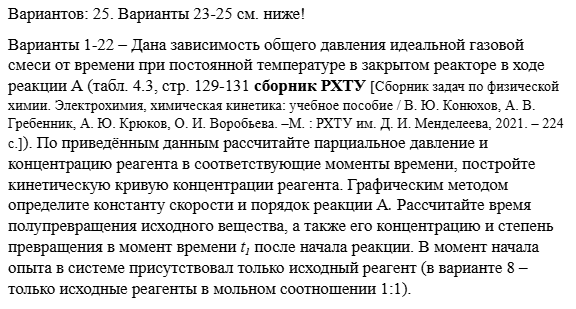
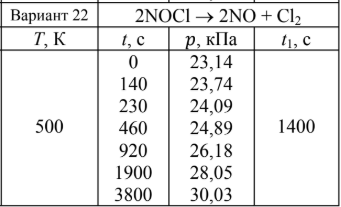

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

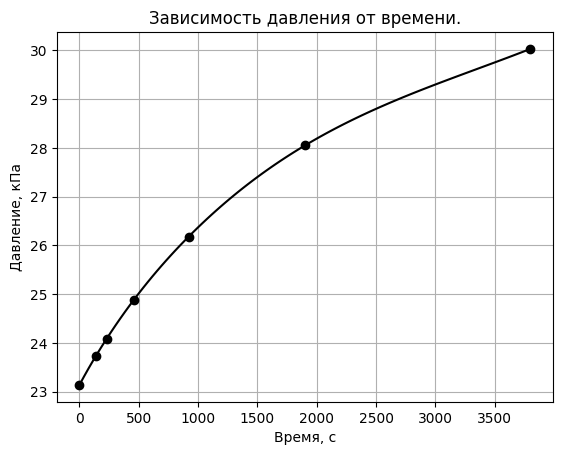

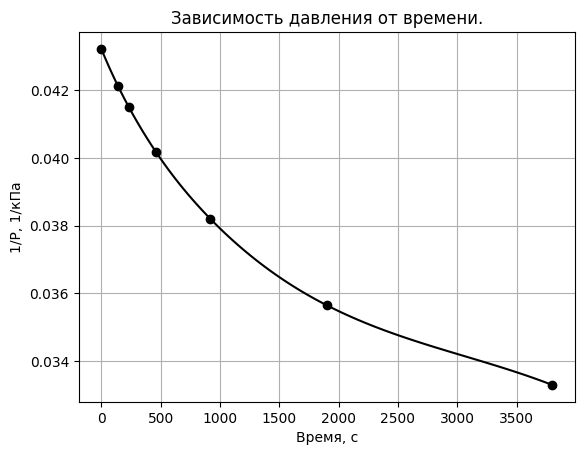

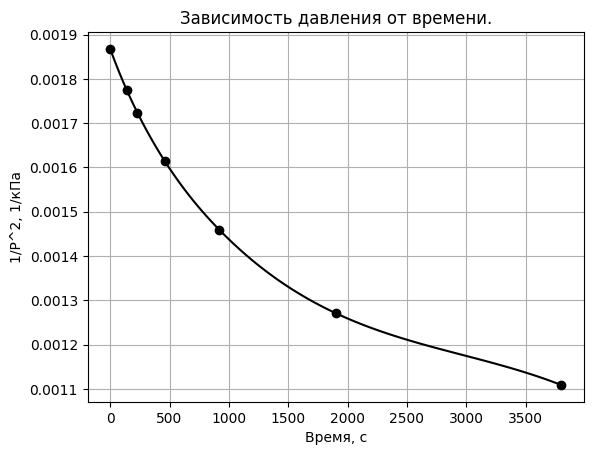

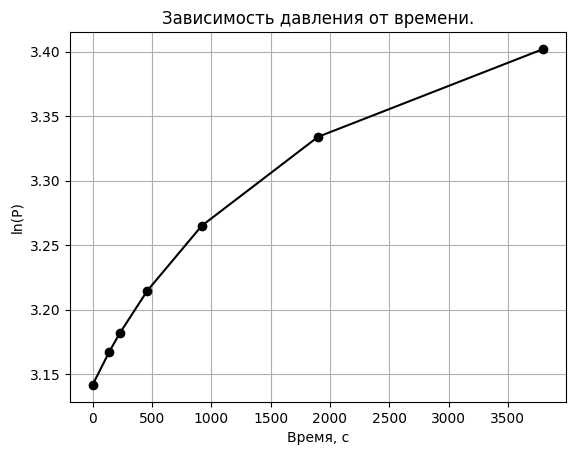

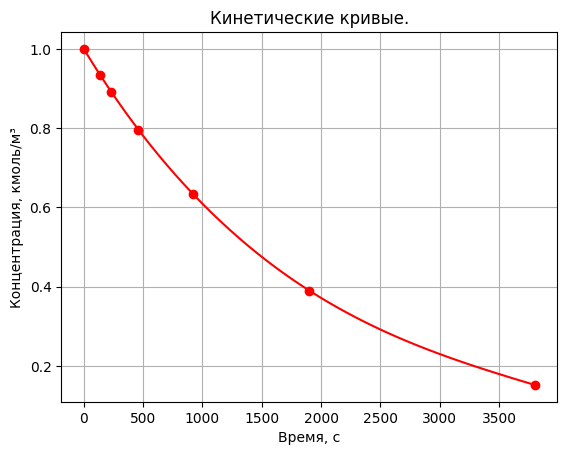

Ответ: 
а) график*
б) k = 0.0004951051289713895
в) первый порядок реакции
г) время полупревращения = 1400c
д) С(t1) = 0.49960396371152516
e) e = 0.5003960362884748


In [14]:
# w_A = dC_A/dt = -2r = -2k * C_A (1)
# w_B = dC_B/dt = 2r = 2k * C_A
# w_B = dC_C/dt = r = k * C_A

# r = 1/v_i*dC_i/dt = -1/2 * dC_A/dt = 1/2 * dC_B/dt = dC_C/dt

# (1) => C_A(t) = 1/t * 1/2k + C_A0 
#  имеем C(t) = 1/t, => 1/C(t) = t (реакция первого порядка)

#0
t = [0, 140, 230, 460, 920, 1900, 3800]
P = [23.14, 23.74, 24.09, 24.89, 26.18, 28.05, 30.03]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, P, kind='cubic')
new_P = interp_func(new_t)
plt.figure(1)
plt.plot(new_t, new_P, color="black", label='Интерполяция (cubic)')
plt.plot(t, P, 'o', color='black', label='Исходные данные')  
plt.xlabel('Время, с'); plt.ylabel('Давление, кПа'); plt.title('Зависимость давления от времени.'); plt.grid(); 
plt.show()
#0
t = [0, 140, 230, 460, 920, 1900, 3800]
P = [1/23.14, 1/23.74, 1/24.09, 1/24.89, 1/26.18, 1/28.05, 1/30.03]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, P, kind='cubic')
new_P = interp_func(new_t)
plt.figure(1)
plt.plot(new_t, new_P, color="black", label='Интерполяция (cubic)')
plt.plot(t, P, 'o', color='black', label='Исходные данные')  
plt.xlabel('Время, с'); plt.ylabel('1/P, 1/кПа'); plt.title('Зависимость давления от времени.'); plt.grid(); 
plt.show()
#0
t = [0, 140, 230, 460, 920, 1900, 3800]
P = [1/23.14**2, 1/23.74**2, 1/24.09**2, 1/24.89**2, 1/26.18**2, 1/28.05**2, 1/30.03**2]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, P, kind='cubic')
new_P = interp_func(new_t)
plt.figure(1)
plt.plot(new_t, new_P, color="black", label='Интерполяция (cubic)')
plt.plot(t, P, 'o', color='black', label='Исходные данные')  
plt.xlabel('Время, с'); plt.ylabel('1/P^2, 1/кПа'); plt.title('Зависимость давления от времени.'); plt.grid(); 
plt.show()
#0
t = [0, 140, 230, 460, 920, 1900, 3800]
P0 = [23.14, 23.74, 24.09, 24.89, 26.18, 28.05, 30.03]  
P = [math.log(p) for p in P0]
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, P, kind='linear')
new_P = interp_func(new_t)
plt.figure(1)
plt.plot(new_t, new_P, color="black", label='Интерполяция (cubic)')
plt.plot(t, P, 'o', color='black', label='Исходные данные')  
plt.xlabel('Время, с'); plt.ylabel('ln(P)'); plt.title('Зависимость давления от времени.'); plt.grid(); 
plt.show()

# t_1/2 = ln2/k => k = ln2 / t_1/2
t_half = 1400;
k = math.log(2) / t_half;

# C_A = 1 * exp(-k * t)
def C_A(t):
    C_A = 1 * math.exp(-k * t)
    return C_A

def C_B(t):
    C_A = 1 * math.exp(-k * t)
    C_B = C_A * (-1)
    return C_B

def C_C(t):
    C_A = 1 * math.exp(-k * t)
    C_C = C_A * (-1/2)
    return C_C


#A
t = [0, 140, 230, 460, 920, 1900, 3800]
C_A = [C_A(0), C_A(140), C_A(230), C_A(460), C_A(920), C_A(1900), C_A(3800)]  
new_t = np.linspace(0, 3800, 100)
interp_func = interp1d(t, C_A, kind='cubic')
new_C_A = interp_func(new_t)
plt.figure(1)
plt.plot(new_t, new_C_A, color="red", label='Интерполяция (cubic)')
plt.plot(t, C_A, 'o', color='red', label='Исходные данные')  
plt.xlabel('Время, с'); plt.ylabel('Концентрация, кмоль/м³'); plt.title('Кинетические кривые.'); plt.grid(); 
plt.show()

# t_1/2 = 1400 (дано)
t1 = 1400;
# C = C(t1)
C = interp_func(t1)

# e = (C0 - C(t1)) / C0
C0 = 1 #(усл.)
e = (C0 - C) / C0


# #B
# t = [0, 140, 230, 460, 920, 1900, 3800]
# C_B = [C_B(0), C_B(140), C_B(230), C_B(460), C_B(920), C_B(1900), C_B(3800)]  
# new_t = np.linspace(0, 3800, 100)
# interp_func = interp1d(t, C_B, kind='cubic')
# new_C_B = interp_func(new_t)
# plt.figure(2)
# plt.plot(new_t, new_C_B, color="purple", label='Интерполяция (cubic)')
# plt.plot(t, C_B, 'o', color='purple', label='Исходные данные')  
# plt.title("C_B = (-1) * exp(-k * t)"); plt.xlabel("t"); plt.ylabel("C_B"); plt.grid(); plt.show()

# #C 
# t = [0, 140, 230, 460, 920, 1900, 3800]
# C_C = [C_C(0), C_C(140), C_C(230), C_C(460), C_C(920), C_C(1900), C_C(3800)]  
# new_t = np.linspace(0, 3800, 100)
# interp_func = interp1d(t, C_C, kind='cubic')
# new_C_C = interp_func(new_t)
# plt.figure(2)
# plt.plot(new_t, new_C_C, color="green", label='Интерполяция (cubic)')
# plt.plot(t, C_C, 'o', color='green', label='Исходные данные')  
# plt.title("C_C = (-1/2) * exp(-k * t)"); plt.xlabel("t"); plt.ylabel("C_C"); plt.grid(); plt.show()

print(f"Ответ: \nа) график*\nб) k = {k}\nв) первый порядок реакции\nг) время полупревращения = {t_half}c\nд) С(t1) = {C}\ne) e = {e}")

### Задание 2
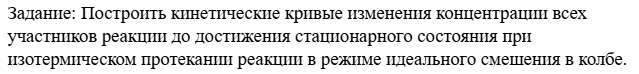
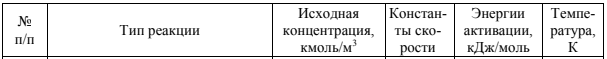
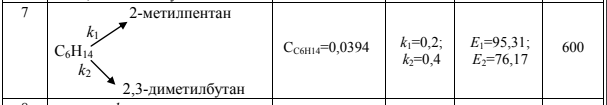

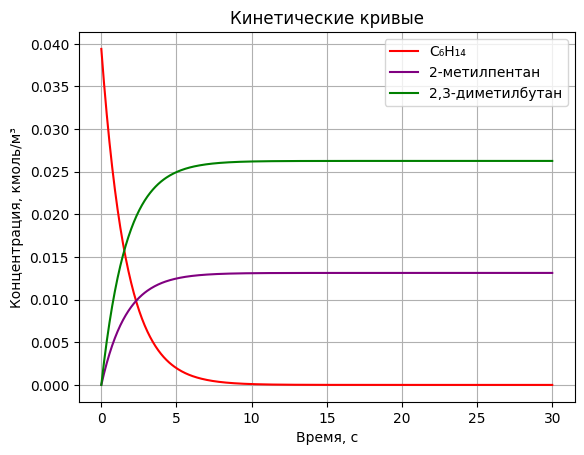

In [12]:
# Данные
k1 = 0.2  # 1/с
k2 = 0.4  # 1/с
C_A0 = 0.0394  # кмоль/м^3
C_B0 = 0.0
C_C0 = 0.0

# Система уравнений
def kinetics(t, y):
    C_A, C_B, C_C = y
    dC_Adt = -(k1 + k2) * C_A
    dC_Bdt = k1 * C_A
    dC_Cdt = k2 * C_A
    return [dC_Adt, dC_Bdt, dC_Cdt]

# Временной интервал
t_span = (0, 30)  # секунд
t_eval = np.linspace(*t_span, 500)

# Решение
sol = solve_ivp(kinetics, t_span, [C_A0, C_B0, C_C0], t_eval=t_eval)

# График
plt.plot(sol.t, sol.y[0], color = "red", label='C₆H₁₄')
plt.plot(sol.t, sol.y[1], color = "purple", label='2-метилпентан')
plt.plot(sol.t, sol.y[2], color = "green", label='2,3-диметилбутан')
plt.xlabel('Время, с'); plt.ylabel('Концентрация, кмоль/м³'); plt.title('Кинетические кривые'); plt.legend(); plt.grid()
plt.show()


### Теория